In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import random
from tqdm import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
import missingno as msno
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [147]:
def draw_cm(cm, title):

    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

    ax.set_title(title);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()


In [148]:
df = pd.read_csv('../../output/data_clean/training_logit_data.csv', index_col=0)

In [149]:
X = df.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df['dropped']

<AxesSubplot:>

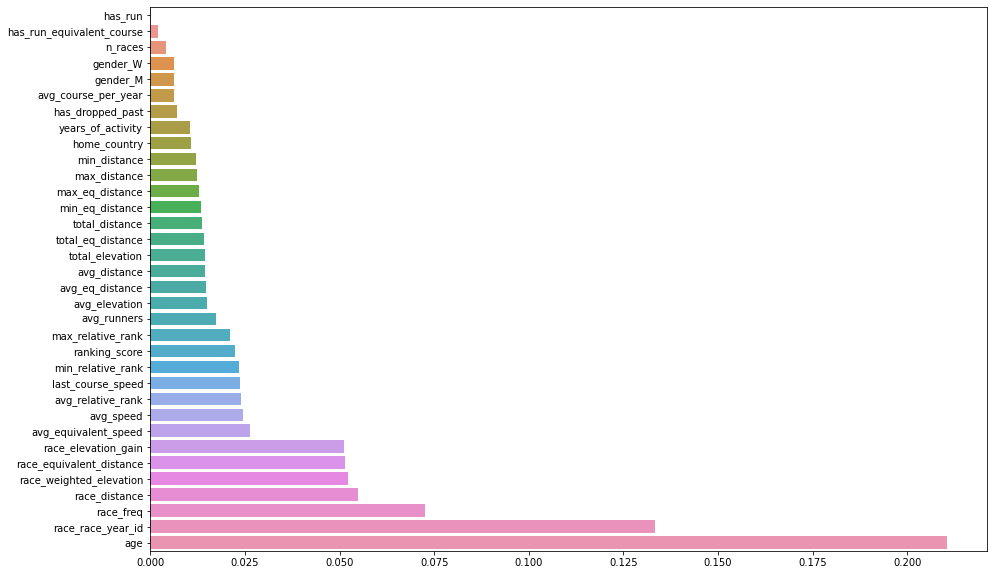

In [150]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls.fit(X, y)
importance = cls.feature_importances_
features = X.columns
df_importance = pd.DataFrame({'features':features,'importance':importance})
df_importance = df_importance.sort_values(by = ['importance'], ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x = importance, y = features, data = df_importance, order=df_importance.sort_values('importance').features)

In [151]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']

In [158]:
def incremental_logit(importance_df, X, y):
    X = StandardScaler().fit_transform(X)
    logreg=LogisticRegression(max_iter = 1000, n_jobs = 4)
    
    importance_df = importance_df.sort_values('importance', ascending=False)
    incr_logit_score = pd.DataFrame()
    
    for i in tqdm(range(len(importance_df)-10)):
        predicted = cross_val_predict(logreg, X[:, i+1], y, cv=5)
        accuracy = metrics.accuracy_score(y, predicted)
        incr_logit_score = incr_logit_score.append({
                                'variable':i,
                                 'accuracy':accuracy
                                }, ignore_index=True)
        
    return incr_logit_score
    
res = incremental_logit(df_importance,X,y)

  0%|                                                    | 0/24 [00:00<?, ?it/s]


ValueError: Expected 2D array, got 1D array instead:
array=[-0.5012924  -0.5012924  -0.04635992 ... -0.04635992  0.40857257
 -0.04635992].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<AxesSubplot:xlabel='variable', ylabel='accuracy'>

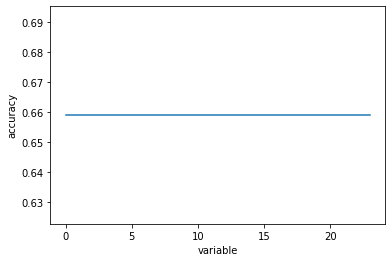

In [155]:
sns.lineplot(
    x = 'variable',
    y = 'accuracy',
    data = res
)

In [122]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])

In [123]:
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']

<AxesSubplot:>

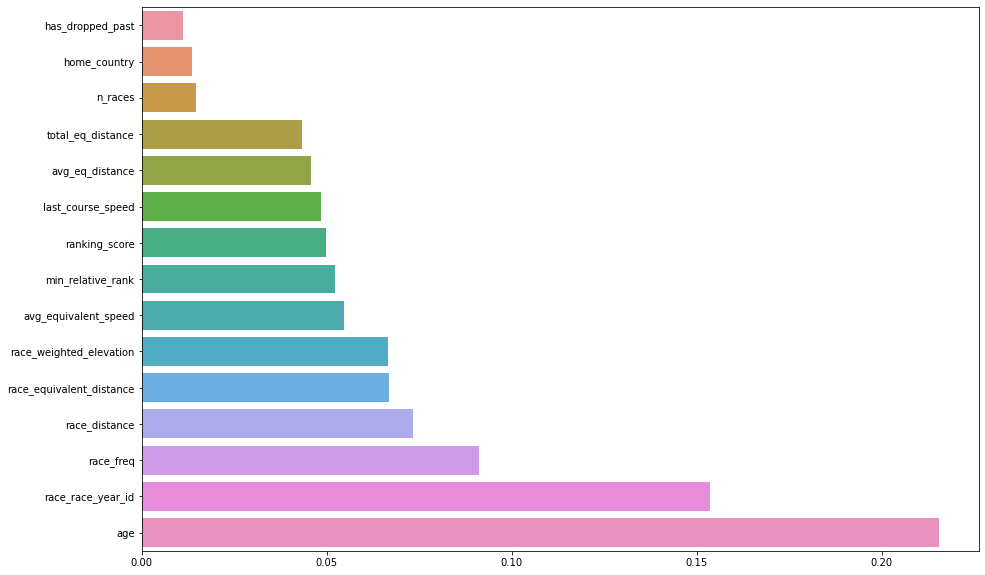

In [124]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls.fit(X, y)
importance = cls.feature_importances_
features = X.columns
df_importance = pd.DataFrame({'features':features,'importance':importance})
df_importance = df_importance.sort_values(by = ['importance'], ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x = importance, y = features, data = df_importance, order=df_importance.sort_values('importance').features)

<AxesSubplot:>

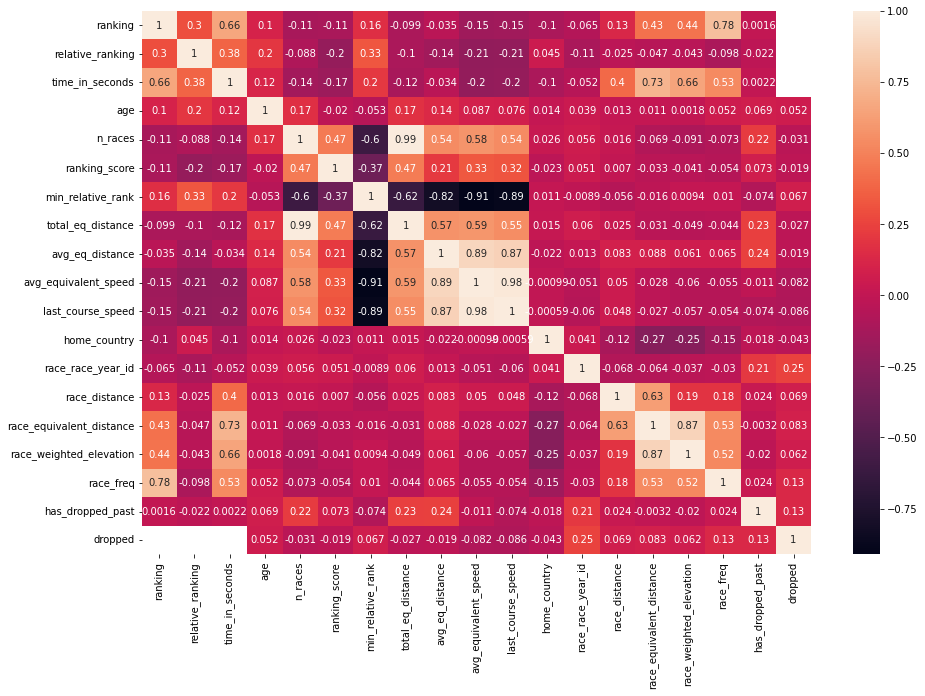

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True)

# KPPV

In [126]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']

In [127]:
param_grid ={
        'n_neighbors' : [a for a in range(2,50)]
    }
estimator = KNeighborsClassifier()
clf = GridSearchCV(estimator, param_grid)
res_GS = clf.fit(X,y)

KeyboardInterrupt: 

In [128]:
k_star = res_GS.best_params_['n_neighbors']

cls = KNeighborsClassifier(n_neighbors=k_star, n_jobs=4)

predicted = cross_val_predict(cls, X, y, cv=10)

#Calculating and printing the f1 score 
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))
cm = metrics.confusion_matrix(y, predicted)

0.5191109767160569
              precision    recall  f1-score   support

         0.0       0.51      0.72      0.60     16535
         1.0       0.53      0.32      0.40     16535

    accuracy                           0.52     33070
   macro avg       0.52      0.52      0.50     33070
weighted avg       0.52      0.52      0.50     33070



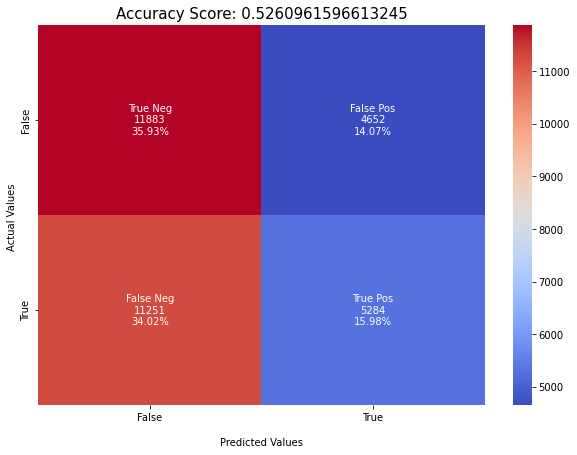

In [129]:
plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)



ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y, predicted))
plt.title(all_sample_title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_KPPV_eq.pdf")
plt.show()


Avec tous les individus

In [130]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']

In [131]:
k_star = 36

cls = KNeighborsClassifier(n_neighbors=k_star, n_jobs=4)

predicted = cross_val_predict(cls, X, y, cv=10)

#Calculating and printing the f1 score 
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))
cm = metrics.confusion_matrix(y, predicted)

0.6032599271718397
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75    104572
         1.0       0.05      0.11      0.07     16535

    accuracy                           0.60    121107
   macro avg       0.44      0.40      0.41    121107
weighted avg       0.72      0.60      0.66    121107



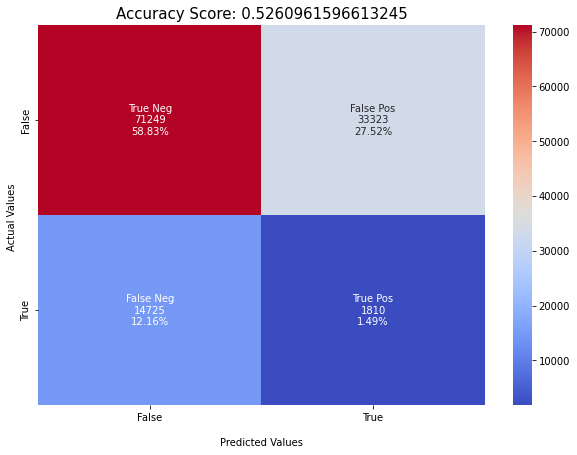

In [132]:
plt.figure(figsize=(10,7))

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)



ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')

title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y, predicted))
plt.title(all_sample_title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_KPPV_all.pdf")

plt.show()


# Classifieur de Bayes

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## LDA

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68     16535
         1.0       0.68      0.67      0.68     16535

    accuracy                           0.68     33070
   macro avg       0.68      0.68      0.68     33070
weighted avg       0.68      0.68      0.68     33070

0.6796492289083762
0.6796492289083762


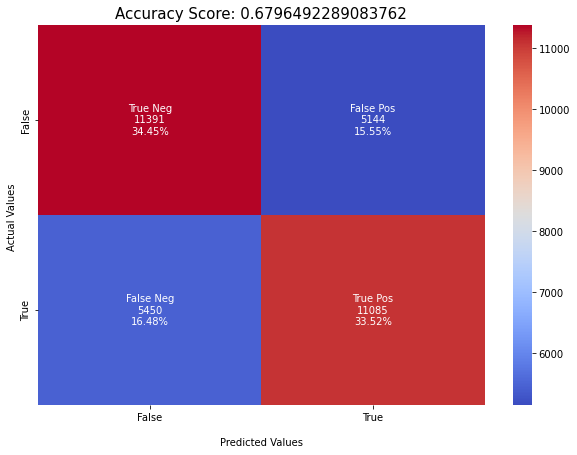

In [134]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=LinearDiscriminantAnalysis()

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_LDA_eq.pdf")
plt.show()


              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88    104572
         1.0       0.18      0.14      0.16     16535

    accuracy                           0.80    121107
   macro avg       0.53      0.52      0.52    121107
weighted avg       0.78      0.80      0.79    121107

0.7960398655734185
0.7960398655734185


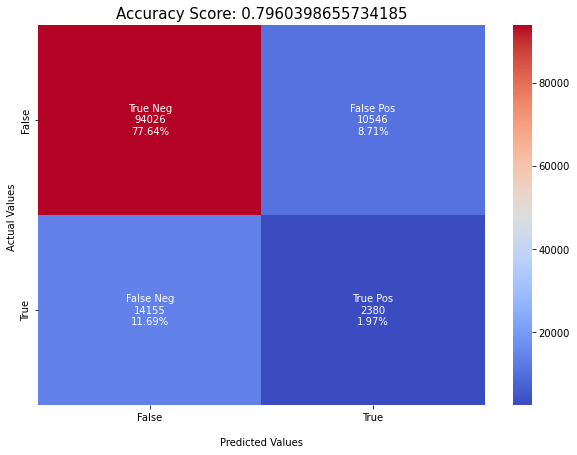

In [135]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=LinearDiscriminantAnalysis()

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_LDA_all.pdf")

plt.show()


## QDA

              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66     16535
         1.0       0.66      0.65      0.65     16535

    accuracy                           0.66     33070
   macro avg       0.66      0.66      0.66     33070
weighted avg       0.66      0.66      0.66     33070

0.656456002419111
0.656456002419111


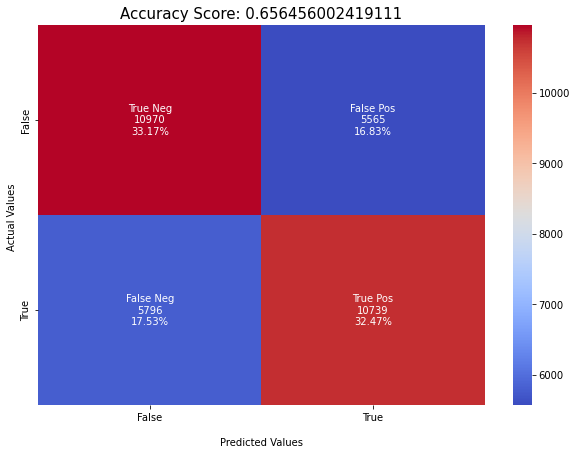

In [136]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=QuadraticDiscriminantAnalysis()

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_QDA_eq.pdf")
plt.show()


              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86    104572
         1.0       0.22      0.31      0.26     16535

    accuracy                           0.76    121107
   macro avg       0.55      0.57      0.56    121107
weighted avg       0.79      0.76      0.78    121107

0.7600799293187016
0.7600799293187016


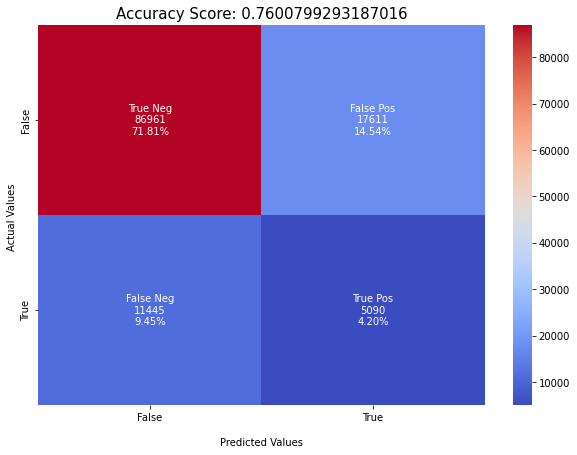

In [137]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=QuadraticDiscriminantAnalysis()

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_QDA_all.pdf")
plt.show()


## GNB

              precision    recall  f1-score   support

         0.0       0.66      0.59      0.62     16535
         1.0       0.63      0.70      0.66     16535

    accuracy                           0.64     33070
   macro avg       0.64      0.64      0.64     33070
weighted avg       0.64      0.64      0.64     33070

0.6429089809495011
0.6429089809495011


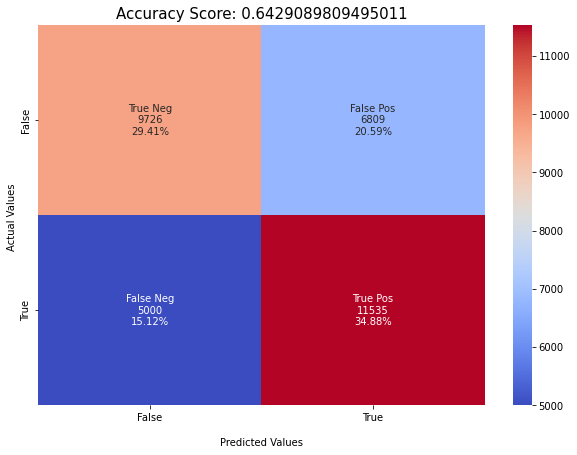

In [138]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=GaussianNB()

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_GNB_eq.pdf")
plt.show()


              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87    104572
         1.0       0.27      0.36      0.31     16535

    accuracy                           0.78    121107
   macro avg       0.58      0.60      0.59    121107
weighted avg       0.81      0.78      0.79    121107

0.7773621673396253
0.7773621673396253


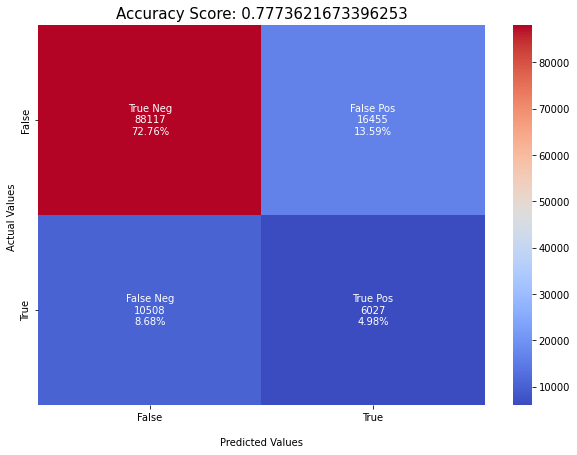

In [139]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=GaussianNB()

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_GNB_all.pdf")
plt.show()


# LogReg

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68     16535
         1.0       0.68      0.67      0.67     16535

    accuracy                           0.68     33070
   macro avg       0.68      0.68      0.68     33070
weighted avg       0.68      0.68      0.68     33070

0.6789537345025703
0.6789537345025703


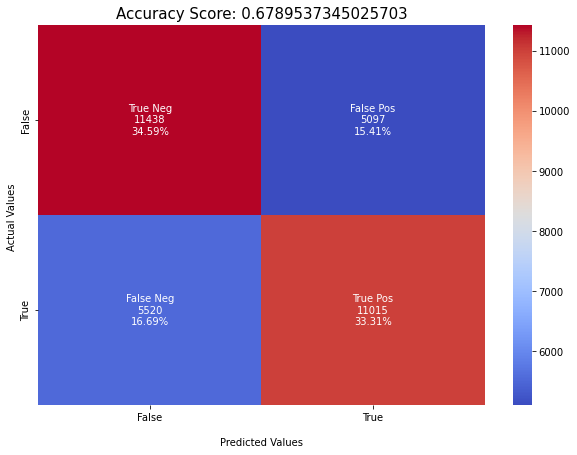

In [140]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=LogisticRegression(solver='newton-cg', n_jobs=4)

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_LogReg_eq.pdf")
plt.show()


              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89    104572
         1.0       0.18      0.11      0.14     16535

    accuracy                           0.81    121107
   macro avg       0.52      0.52      0.52    121107
weighted avg       0.77      0.81      0.79    121107

0.8082026637601459
0.8082026637601459


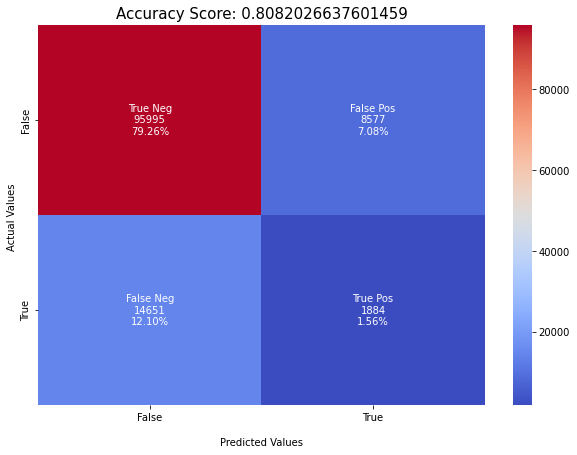

In [160]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=LogisticRegression(solver='newton-cg', n_jobs=4, multi_class='ovr')

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_LogReg_all_not_balanced.pdf")
plt.show()


La régression logistique dispose d'un système de pénalité et de poids des classes que nous allons utiliser pour mieux estimer et améliorer le score F1.

              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76    104572
         1.0       0.24      0.71      0.36     16535

    accuracy                           0.65    121107
   macro avg       0.59      0.68      0.56    121107
weighted avg       0.84      0.65      0.71    121107

0.652034977334093
0.652034977334093


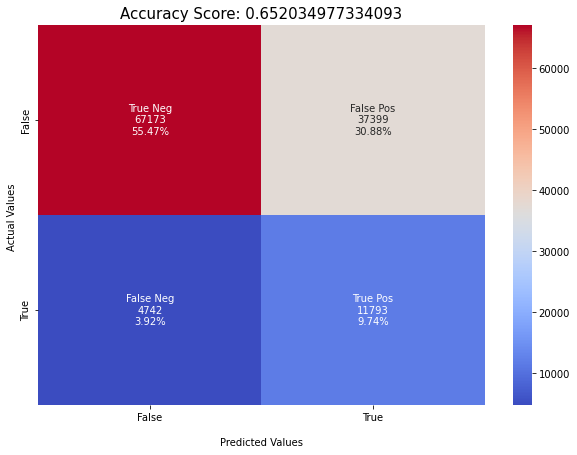

In [161]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=LogisticRegression(solver='newton-cg', n_jobs=4, class_weight={0: 1 , 1: 7.2}, multi_class='ovr')

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_LogReg_all_balanced.pdf")
plt.show()


# Random Forest

              precision    recall  f1-score   support

         0.0       0.49      0.79      0.60     16535
         1.0       0.46      0.18      0.26     16535

    accuracy                           0.48     33070
   macro avg       0.47      0.48      0.43     33070
weighted avg       0.47      0.48      0.43     33070

0.48297550650136073
0.48297550650136073


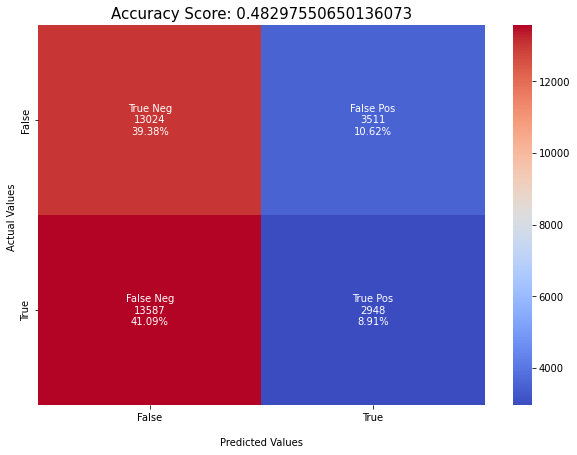

In [143]:
df_dropped = df2.loc[df.dropped == True]
df_ndropped = df2.loc[df.dropped == False].sample(n = 16535, random_state=0)
df2 = pd.concat([df_dropped, df_ndropped])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=clf = RandomForestClassifier(random_state=0)

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_RF_eq.pdf")

plt.show()


              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77    104572
         1.0       0.05      0.09      0.06     16535

    accuracy                           0.63    121107
   macro avg       0.44      0.41      0.42    121107
weighted avg       0.73      0.63      0.68    121107

0.6344224528722535
0.6344224528722535


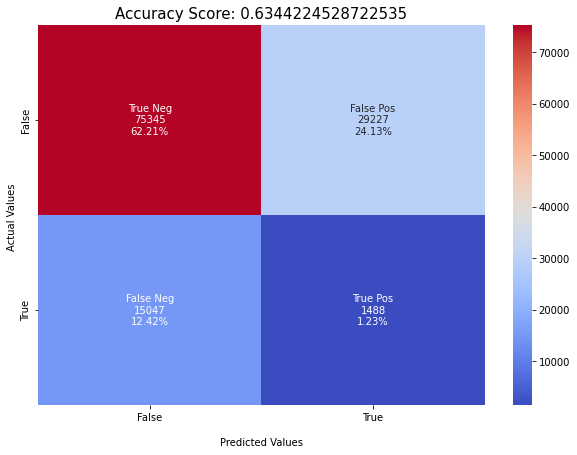

In [144]:
df2 = df.drop(columns=['has_run','has_run_equivalent_course','gender_M','gender_W','avg_course_per_year'
                      , 'min_distance','max_distance','min_eq_distance','avg_speed','total_distance',
                       'total_elevation','avg_distance','avg_elevation','max_eq_distance','avg_runners',
                      'years_of_activity','max_relative_rank','race_elevation_gain','avg_relative_rank'])
X = df2.drop(columns=['rr_id','runner_id','nationality','last_year_activity','dropped','ranking','relative_ranking'
                     ,'time_in_seconds'])
y = df2['dropped']
X = StandardScaler().fit_transform(X)

logreg=clf = RandomForestClassifier(random_state=0, n_jobs=4, class_weight={0: 1 , 1: 7.2})

predicted = cross_val_predict(logreg, X, y, cv=10)
print(metrics.classification_report(y, predicted))
score = metrics.accuracy_score(y, predicted)
print(score)
cm = metrics.confusion_matrix(y, predicted)

plt.figure(figsize=(10,7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')
title = 'Accuracy Score: {0}'.format(score)
print(score)
plt.title(title, size = 15)
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.savefig("CM_dropped_RF_all.pdf")
plt.show()
